In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?

2.) Did the poll results favor Romney or Obama?

3.) How do undecided voters effect the poll?

4.) Can we account for the undecided voters?

5.) How did voter sentiment change over time?

6.) Can we see an effect in the polls from the debates?


In [1]:
#Libraries

#Data
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Download the data
from io import StringIO
import requests

#For division
from __future__ import division

In [2]:
#Downloading the data and loading them in Python
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text

poll_data = StringIO(source)

In [3]:
#Data to DataFrame

poll_df = pd.read_csv(poll_data)

In [4]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [39]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference for Obama,Start_date
585,PPP (D),2009-03-13,2009-03-15,2010-11-08T10:36:31Z,1403.0,Registered Voters,Automated Phone,44.0,44.0,12.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/PPP_Rel...,Pollster,Dem,0.00,2009-03-13
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,0.11,2009-04-17
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,0.18,2009-05-14
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,0.08,2009-06-12
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,0.09,2009-07-15


In [38]:
poll_df = poll_df.sort_values(by=['Start Date','End Date'])

1.) Who was being polled and what was their party affiliation?

In [6]:
poll_df.drop(columns=["Question Text","Question Iteration","Other"],inplace=True)

In [7]:
#Swithching the Other to None
poll_df['Affiliation'].loc[poll_df['Affiliation'] == 'Other'] = 'None'

/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


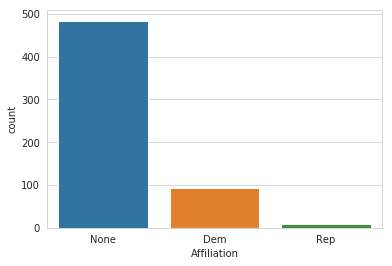

In [8]:
#First look at the affiliation
poll_df['Affiliation'].value_counts() / len(poll_df) * 100

sns.countplot('Affiliation',data = poll_df,order = ['None','Dem','Rep'])

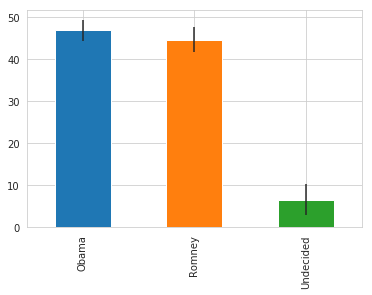

In [9]:
#First, the mean
avg = poll_df[['Obama','Romney','Undecided','Number of Observations']].mean()
avg.drop("Number of Observations",axis=0,inplace=True)

#Second, the error
std = poll_df[['Obama','Romney','Undecided','Number of Observations']].std()
std.drop("Number of Observations",axis=0, inplace=True)

#Let's plot everything
avg.plot(yerr = std,kind = "bar", legend = False)

In [10]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['avg','std']

In [11]:
poll_avg

,avg,std
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


It seems super tight!

In [12]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


In [13]:
poll_df['End Date'] = pd.to_datetime(poll_df['End Date'],yearfirst=True).sort_values(ascending= True)
poll_df['Start Date'] = pd.to_datetime(poll_df['Start Date'],yearfirst=True)

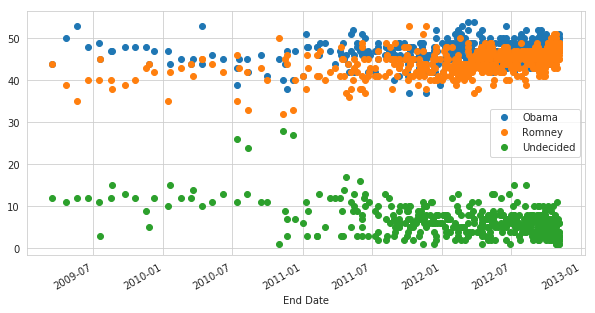

In [14]:
poll_df.plot(x="End Date",y=['Obama','Romney','Undecided'],marker = "o", linestyle = " ", figsize=(10,5),legend=True)

In [15]:
from datetime import datetime

In [16]:
poll_df['Difference for Obama'] = (poll_df['Obama'] - poll_df['Romney']) / 100

In [17]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference for Obama
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [18]:
poll_df_groupby = poll_df.groupby("Start Date").mean()

In [19]:
poll_df_groupby.reset_index(drop=False,inplace=True)

In [20]:
poll_df_groupby['Start Date'] = pd.to_datetime(poll_df_groupby['Start Date'])

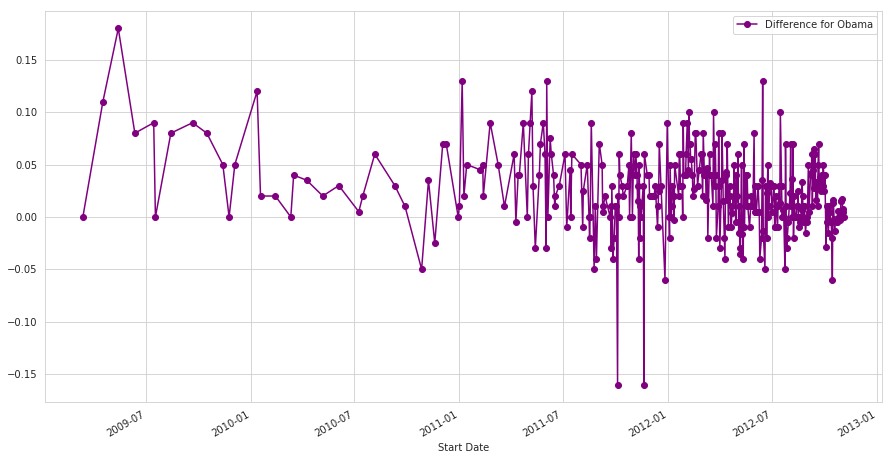

In [21]:
fig = poll_df_groupby.plot("Start Date","Difference for Obama",color = "purple",marker = "o", figsize = (15,8),linestyle = "-")

In [22]:
poll_df['Start_date'] = poll_df['Start Date'].astype('str').sort_values(ascending=False)

In [23]:
len(poll_df['Start Date'])

586

In [49]:
#To know how to find the row index of October 2012

# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for dates in poll_df['Start_date']:
    if dates[0:7] == "2012-10":
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print (min(xlimit))
print (max(xlimit))

485
566


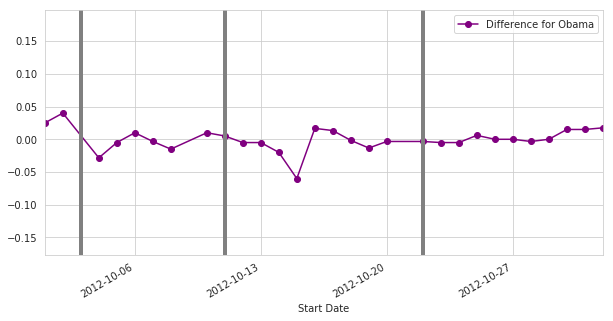

In [68]:
# Start with original figure
fig = poll_df_groupby.plot("Start Date","Difference for Obama",color = "purple",marker = "o", figsize = (10,5),linestyle = "-",xlim=("2012-10-01","2012-11-01"))# Now add the debate markers regarding of their date

#Oct 3rd, Oct 11, and Oct 22nd are the dates of the debates
plt.axvline(x="2012-10-03", linewidth=4, color='grey')
plt.axvline(x="2012-10-11", linewidth=4, color='grey')
plt.axvline(x="2012-10-22", linewidth=4, color='grey')

"Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though memory serves that he performed much worse against Romney during the first debate."

Donor Data Set

Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign.

This is going to be the biggest data set we've looked at so far. You can download it here , then make sure to save it to the same folder your iPython Notebooks are in.

The questions we will be trying to answer while looking at this Data Set is:

1.) How much was donated and what was the average donation?

2.) How did the donations differ between candidates?

3.) How did the donations differ between Democrats and Republicans?

4.) What were the demographics of the donors?

5.) Is there a pattern to donation amounts?

In [69]:
donor_df = pd.read_csv("./Election_Donor_Data.csv")

/home/alex/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
donor_df.head(10)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [72]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [73]:
donor_df.isnull().sum()

cmte_id                   0
cand_id                   0
cand_nm                   0
contbr_nm                 0
contbr_city              19
contbr_st                 4
contbr_zip              111
contbr_employer       13729
contbr_occupation      8430
contb_receipt_amt         0
contb_receipt_dt          0
receipt_desc         987565
memo_cd              909249
memo_text            903961
form_tp                   0
file_num                  0
dtype: int64

In [74]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [78]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print("The mean donation is {:2f} and the standard deviation is {:2f}".format(don_mean,don_std))

The mean donation is 298.235150 and the standard deviation is 3749.666723


In [87]:
#let's see the top donor
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor = top_donor.sort_values(ascending=True)
top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

Looks like we have some negative values, as well as some huge donation amounts! The negative values are due to the FEC recording refunds as well as donations, let's go ahead and only look at the positive contribution amounts

In [88]:
top_donor = top_donor[top_donor > 0]

In [91]:
top_donor = top_donor.sort_values(ascending = False)

In [92]:
top_donor.head(10)

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
335187     512710.91
257270     451726.00
114754      33300.00
217891      25800.00
823345      25000.00
Name: contb_receipt_amt, dtype: float64

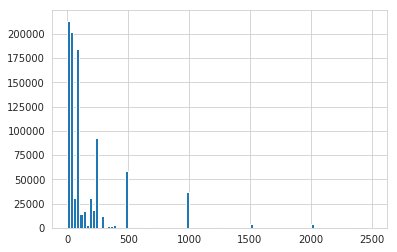

In [96]:
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=100)



Let's dive deeper into the data and see if we can seperate donations by Party, in order to do this we'll have to figure out a way of creating a new 'Party' column. We can do this by starting with the candidates and their affliliation. Now let's go ahead and get a list of candidates


In [97]:
candidates = donor_df.cand_nm.unique()

In [98]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [99]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

donor_df['Party'] = donor_df['cand_nm'].map(party_map)

In [100]:
donor_df.head(10)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [106]:
# Groupby candidate and then display the total number of people who donated
donor_df.groupby("cand_nm")["contb_receipt_amt"].count()

cand_nm
Bachmann, Michelle                 13140
Cain, Herman                       20107
Gingrich, Newt                     47679
Huntsman, Jon                       4156
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  74
Obama, Barack                     593746
Paul, Ron                         143757
Pawlenty, Timothy                   4555
Perry, Rick                        13575
Roemer, Charles E. 'Buddy' III      5920
Romney, Mitt                      107229
Santorum, Rick                     46559
Name: contb_receipt_amt, dtype: int64

In [108]:
# Groupby candidate and then display the total number of people who donated
donor_df.groupby("cand_nm")["contb_receipt_amt"].sum()

cand_nm
Bachmann, Michelle                2.677435e+06
Cain, Herman                      7.047265e+06
Gingrich, Newt                    1.201183e+07
Huntsman, Jon                     3.204350e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.703000e+04
Obama, Barack                     1.335026e+08
Paul, Ron                         2.072257e+07
Pawlenty, Timothy                 4.255054e+06
Perry, Rick                       1.841151e+07
Roemer, Charles E. 'Buddy' III    3.674575e+05
Romney, Mitt                      8.521925e+07
Santorum, Rick                    1.072809e+07
Name: contb_receipt_amt, dtype: float64

In [123]:
count_donor = donor_df.groupby("cand_nm")["contb_receipt_amt"].sum()

i=0
for don in count_donor:
    print ("The candidate {} raised {:0.0f} dollars".format(count_donor.index[i],don))
    print ('\n')
    i+=1

The candidate Bachmann, Michelle raised 2677435 dollars


The candidate Cain, Herman raised 7047265 dollars


The candidate Gingrich, Newt raised 12011832 dollars


The candidate Huntsman, Jon raised 3204350 dollars


The candidate Johnson, Gary Earl raised 566962 dollars


The candidate McCotter, Thaddeus G raised 37030 dollars


The candidate Obama, Barack raised 133502591 dollars


The candidate Paul, Ron raised 20722567 dollars


The candidate Pawlenty, Timothy raised 4255054 dollars


The candidate Perry, Rick raised 18411512 dollars


The candidate Roemer, Charles E. 'Buddy' III raised 367458 dollars


The candidate Romney, Mitt raised 85219249 dollars


The candidate Santorum, Rick raised 10728090 dollars




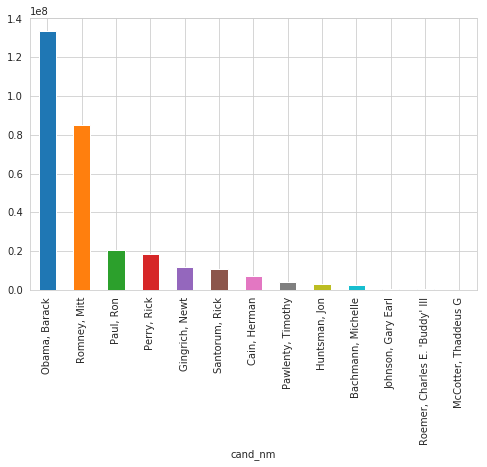

In [173]:
#PLot out total donation amounts
count_donor = count_donor.sort_values(ascending=False)
count_donor.plot(kind = "bar",figsize=(8,5))

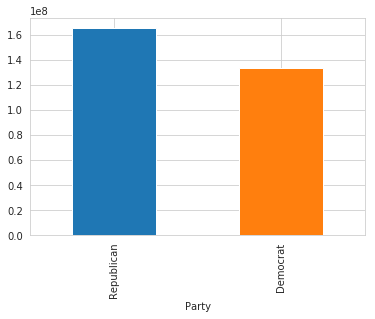

In [133]:
#PLot out total donation amounts by party!
donor_df.groupby("Party")["contb_receipt_amt"].sum().sort_values(ascending=False).plot(kind = "bar")

In [135]:
#Let's see the occupation of the donors
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                              index="contbr_occupation",
                              columns = "Party",
                               aggfunc= "sum")

In [137]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [139]:
occupation_df.shape

(45073, 2)



Wow! This is probably far too large to display effectively with a small, static visualization. What we should do is have a cut-off for total contribution amounts. Afterall, small donations of 20 dollars by one type of occupation won't give us too much insight. So let's set our cut off at 1 million dollars.


In [141]:
occupation_df = occupation_df.loc[occupation_df.sum(1) > 1000000] #.sum(1) is for the sum of the rows

In [142]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7.343540e+06
BANKER,224084.40,1.238819e+06
BUSINESS OWNER,449979.30,1.286532e+06
C.E.O.,1690.00,2.431528e+06
CEO,2069784.79,1.501157e+06
CHAIRMAN,495547.00,1.196048e+06
CONSULTANT,2459812.71,2.472815e+06
ENGINEER,950425.55,1.780102e+06
EXECUTIVE,1355161.05,3.918557e+06


In [143]:
occupation_df.shape

(31, 2)

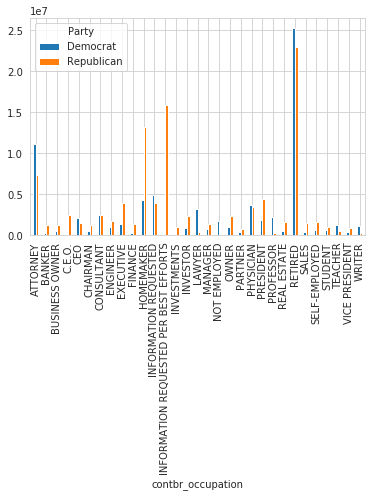

In [150]:
occupation_df.plot(kind="bar")

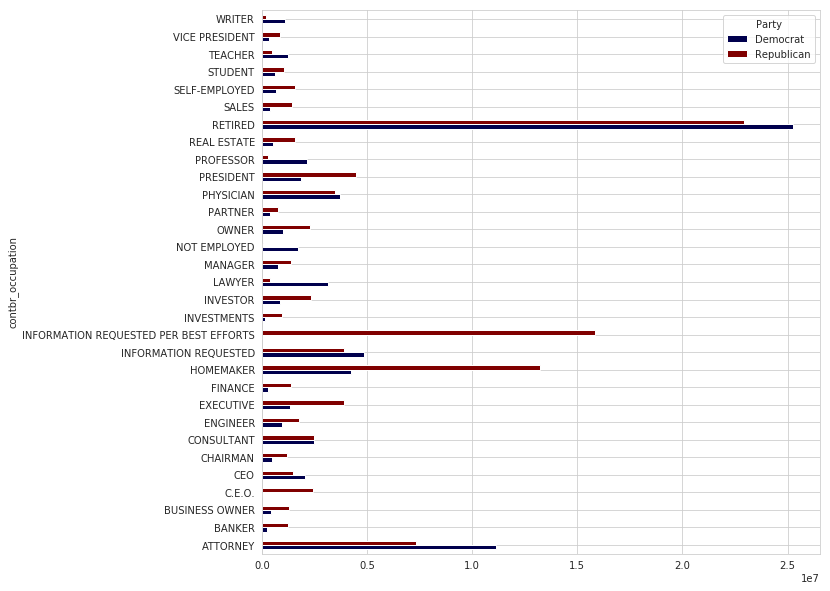

In [151]:
occupation_df.plot(kind="barh",cmap="seismic", figsize = (10,10))

In [152]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis = 0, inplace=True)

/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [161]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.'] 
occupation_df.drop(['C.E.O.'],inplace=True)

/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [169]:
occupation_df.sort_values(by=['Democrat','Republican'])

Party,Democrat,Republican
contbr_occupation,,
INVESTMENTS,160480.00,9.604679e+05
BANKER,224084.40,1.238819e+06
FINANCE,294031.40,1.369990e+06
VICE PRESIDENT,323062.15,8.545383e+05
SALES,391886.91,1.423015e+06
PARTNER,395759.50,7.818971e+05
BUSINESS OWNER,449979.30,1.286532e+06
CHAIRMAN,495547.00,1.196048e+06
REAL ESTATE,528752.09,1.581747e+06


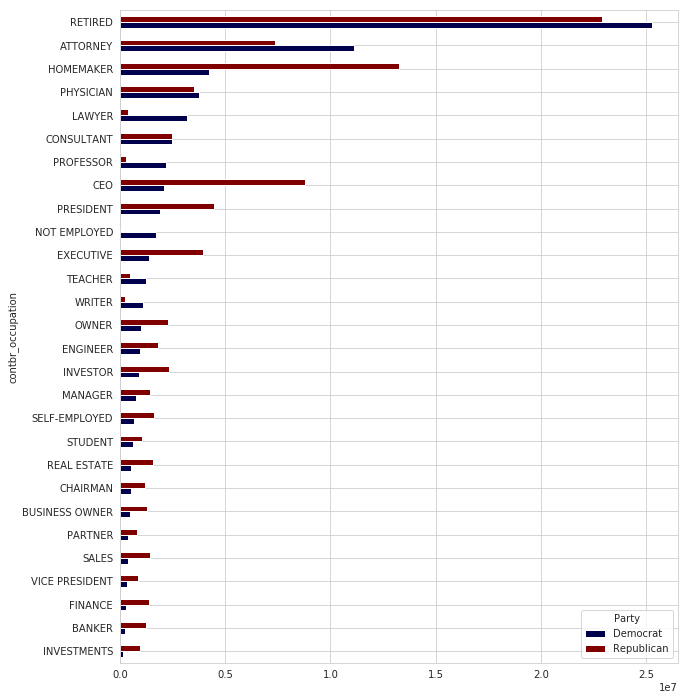

In [171]:
occupation_df = occupation_df.sort_values(by = ['Democrat','Republican'],ascending=True)
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')



Awesome! Looks like CEOs are a little more conservative leaning, this may be due to the tax philosphies of each party during the election.


There's still so much to discover in these rich datasets! Come up with your own political questions you want answered! Or just play around with different methods of visualizing the data!

For more on general data analysis of politics, I highly suggest the 538 website!

Again, great job on getting through the course this far! Go ahead and search the web for more data to discover!